In [2]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_fwf('Data/MLCO2.txt')

In [37]:
data.head(20)

,CO2,Year&Month,Year,Month
0,333.13,1974.38,1974.0,5.0
1,332.09,1974.46,1974.0,6.0
2,331.10,1974.54,1974.0,7.0
3,329.14,1974.63,1974.0,8.0
4,327.36,1974.71,1974.0,9.0
5,327.29,1974.79,1974.0,10.0
6,328.23,1974.88,1974.0,11.0
7,329.55,1974.96,1974.0,12.0
8,NaN,NaN,NaN,NaN
9,330.62,1975.04,1975.0,1.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
CO2           161 non-null float64
Year&Month    161 non-null float64
Year          161 non-null float64
Month         161 non-null float64
dtypes: float64(4)
memory usage: 5.5 KB


In [39]:
data = data.dropna()

In [40]:
#Create row index of the DataFrame using the Year and Month columns
data.index = data['Year'].astype(int).astype(str) + '-' + data['Month'].astype(int).astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year&Month,Year,Month
1974-05,333.13,1974.38,1974.0,5.0
1974-06,332.09,1974.46,1974.0,6.0
1974-07,331.10,1974.54,1974.0,7.0
1974-08,329.14,1974.63,1974.0,8.0
1974-09,327.36,1974.71,1974.0,9.0


In [41]:
data = data.loc[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]

In [42]:
data.sort_values(['Year', 'Month'], inplace=True)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

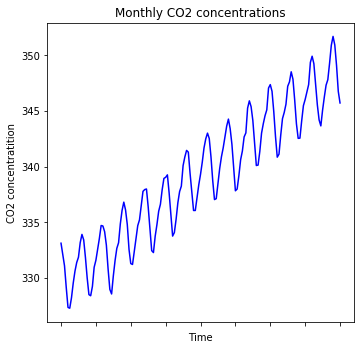

In [44]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

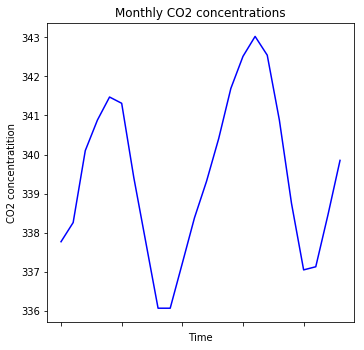

In [45]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
# plt.savefig('plots/ch1/B07887_01_06.png', format='png', dpi=300)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [48]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
                                                           trend_model.intercept_)
      )

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


In [49]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 <a list of 11 Text xticklabel objects>)

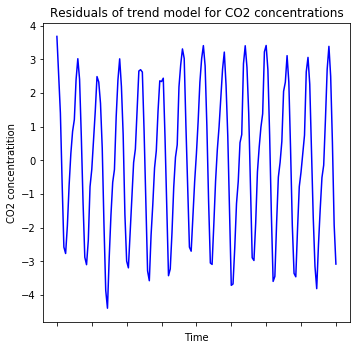

In [50]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
# plt.savefig('plots/ch1/B07887_01_07.png', format='png', dpi=300)

In [51]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'
                    }
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [52]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

In [53]:
#Create row indices of seasonal_sub_series_data using Year & Quarter
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974.0-Q2,1974.0,Q2,3.096398,0.820946
1974.0-Q3,1974.0,Q3,-0.616085,1.991671
1974.0-Q4,1974.0,Q4,-1.822397,1.014952
1975.0-Q1,1975.0,Q1,0.754624,0.511890
1975.0-Q2,1975.0,Q2,2.604978,0.355093


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

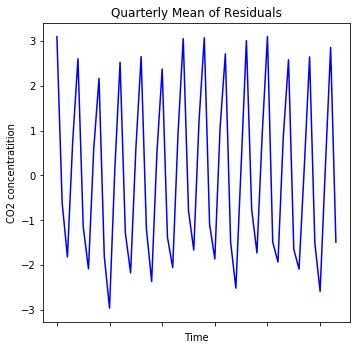

In [54]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
# plt.savefig('plots/ch1/B07887_01_08.png', format='png', dpi=300)

Text(0,0.5,'CO2 concentratition')

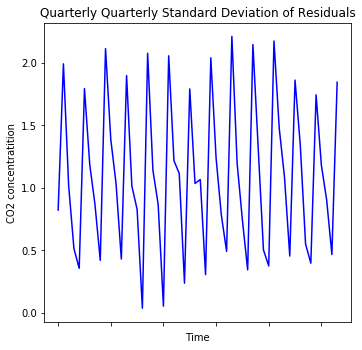

In [62]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
# plt.xticks(rotation=30)
# plt.savefig('plots/ch1/B07887_01_09.png', format='png', dpi=300)

Text(0,0.5,'CO2 concentratition')

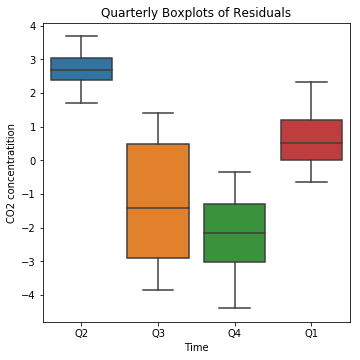

In [56]:
#Multiple box plots to visualize central tendency and dispersion of seasonal sub series
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')
# plt.savefig('plots/ch1/B07887_01_10.png', format='png', dpi=300)

In [59]:
dat = pd.read_csv('Data/DJIA.csv', parse_dates=['Date'])

In [60]:
dat.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


Text(0.5,0,'Time')

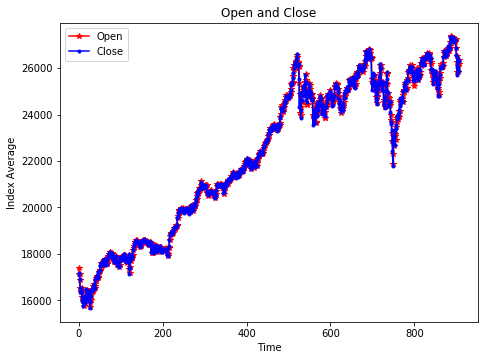

In [61]:
plt.figure(figsize=(7.5, 5.5))
plt.plot(dat['Open'], linestyle='-', marker='*', color='r')
plt.plot(dat['Close'], linestyle='-', marker='.', color='b')
plt.legend(['Open','Close'], loc=2)
plt.title('Open and Close')
plt.ylabel('Index Average')
plt.xlabel('Time')
# plt.savefig('plots/ch1/B07887_01_11.png', format='png', dpi=300)